# Verify HMM Checks

This post recreates the example from ["Bayesian Reasoning and Machine Learning"](http://www.cs.ucl.ac.uk/staff/d.barber/brml/) to sanity check my results. See [my alpha recursion HMM post](2018-05-02-hmm-alpha-recursion.ipynb) and [my viterbi HMM post](2018-05-13-more-exact-inference-in-hmm.ipynb) for the real posts (which use custom generated data instead).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nb_code.hmm_alpha_recursion as prev_post
import nb_code.viterbi as viterbi_post

[11 10  4  3  4 10 16 17 23 17]


In [2]:
# helper functions you can skip over :D
def hide_ticks(plot):
    plot.axes.get_xaxis().set_visible(False)
    plot.axes.get_yaxis().set_visible(False)

## Code

This adjust the constants from the previous posts to match the example in the textbook.

In [3]:
width = 5
height = 5
num_hidden_states = width * height

map_x_y_to_hidden_state_id = np.arange(num_hidden_states).reshape(height, width).T

# prob of starting starting locations
p_hidden_start = np.ones(num_hidden_states) / num_hidden_states

# verify it's a valid probability distribution
assert np.all(np.isclose(np.sum(p_hidden_start), 1))
assert np.all(p_hidden_start >= 0)

p_transition = prev_post.create_transition(width, height)

# Hard code the creak and bump locations!
prob_bump_true_given_location = 0.1 * np.ones(num_hidden_states)
prob_bump_true_given_location[[3, 4, 6, 7, 11, 15, 18, 19, 20, 21]] = 0.9

prob_creak_true_given_location = 0.1 * np.ones(num_hidden_states)
prob_creak_true_given_location[[0, 3, 4, 5, 8, 9, 11, 13, 16, 20]] = 0.9

p_emission = prev_post.get_emission_matrix(prob_bump_true_given_location, prob_creak_true_given_location)

# hard code the visibles and hidden
visibles = np.array([1, 2, 0, 3, 0, 3, 2, 2, 3, 3])
hiddens = np.array([15, 16, 11, 6, 11, 10, 5, 0, 1, 2])

alphas = prev_post.alpha_recursion(
    visibles, 
    p_hidden_start,
    p_transition,
    p_emission,
)

most_likely_states = viterbi_post.viterbi(
    visibles, 
    p_hidden_start,
    p_transition,
    p_emission,
)

### Visualizing bumps and creaks

This should match the image on page 501.

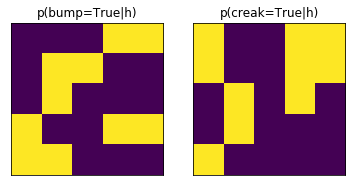

In [4]:
fig, (bump, creak) = plt.subplots(1, 2)

bump.imshow(prob_bump_true_given_location.reshape(height, width))
bump.set_title('p(bump=True|h)')
hide_ticks(bump)

creak.imshow(prob_creak_true_given_location.reshape(height, width))
creak.set_title('p(creak=True|h)')
hide_ticks(creak)

plt.show()

### Visualizing different methods

This should match the image on page 502.

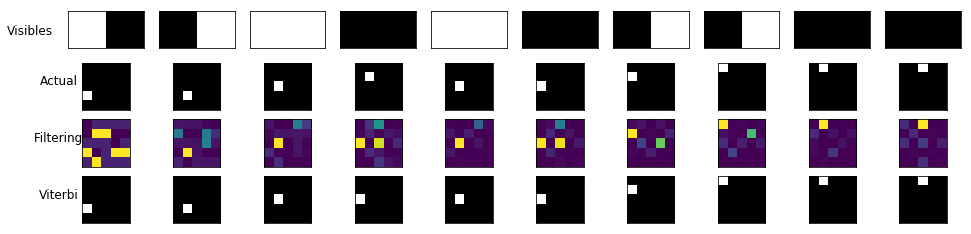

In [5]:
fig, all_axs = plt.subplots(4, prev_post.timesteps, figsize=(16, 4))
all_axs = all_axs.T

VISIBLES = 0
TRUE_STATES = 1
FILTERING = 2
VITERBI = 3

all_axs[0][VISIBLES].set_title('Visibles', x=-0.5, y=0.2)
all_axs[0][TRUE_STATES].set_title('Actual', x=-0.5, y=0.4)
all_axs[0][FILTERING].set_title('Filtering', x=-0.5, y=0.4)
all_axs[0][VITERBI].set_title('Viterbi', x=-0.5, y=0.4)

for i, (axs, hidden, visible, alpha, viterbi) in enumerate(zip(all_axs, hiddens, visibles, alphas, most_likely_states)):
    axs[VISIBLES].imshow([prev_post.map_visible_state_to_bump_creak[visible]], cmap='gray', vmin=0)
    hide_ticks(axs[VISIBLES])    
    
    axs[TRUE_STATES].imshow(prev_post.plot_state_in_room(hidden, width=width, height=height), cmap='gray')
    hide_ticks(axs[TRUE_STATES])
    
    axs[FILTERING].imshow(alpha.reshape(height, width))
    hide_ticks(axs[FILTERING])      
    
    axs[VITERBI].imshow(prev_post.plot_state_in_room(viterbi, width=width, height=height), cmap='gray')
    hide_ticks(axs[VITERBI])
    
plt.show()